<a href="https://colab.research.google.com/github/sinyoung0110/DeepLearning_2024_2/blob/main/SVM2(NEW).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 기본적인 SVC
gamma='scale'

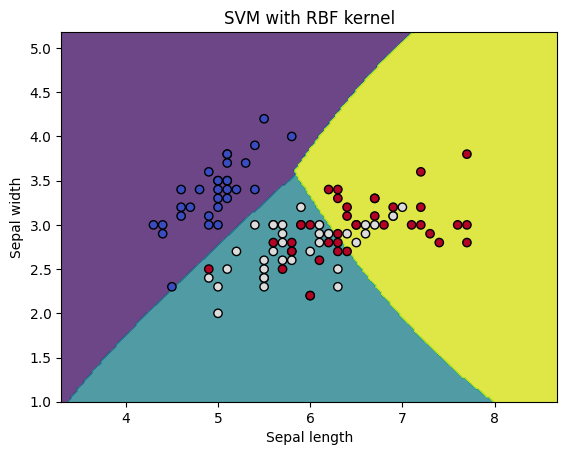

Accuracy: 0.80
Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  3 10]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.70      0.54      0.61        13
           2       0.62      0.77      0.69        13

    accuracy                           0.80        45
   macro avg       0.78      0.77      0.77        45
weighted avg       0.81      0.80      0.80        45



In [22]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 생성 및 학습 (RBF 커널)
model=SVC(kernel='rbf',gamma='scale')
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.02  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title('SVM with RBF kernel')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


#### 하이퍼파라미터 변경
test_size를 0.1로 줄이고
model = SVC(kernel='rbf', C=120.0, gamma=0.001)와

model = SVC(kernel='rbf', C=1.0, gamma=0.1)로 하니 값을 넣은 것 중 가장 좋은 정확도인 93%로 가 나왔습니다.



- - -    
    
     
c와 gamma의 관계를 알기 위해 더 여러가지의 파라미터를 넣어보니

-  c : 오차 허용 정도를 조절하는 파라미터
  - c가 클수록 오차를 줄이기 위해 더 많은 데이터를 완벽하게 분류하려고 합니다.
  - C가 작을수록 오차를 더 많이 허용하며, 오버피팅에 위험이 없습니다.

- gamma : RBF 커널에서 결정 경계의 곡률을 제어하는 역할
  - 작은 gamma는 더 완만한 곡선을 그리기 떄문에 오버피팅에 우려가 없습니다.
  - 큰 gamma는 더 복잡한 곡선을 생성하기 때문에 정확도를 올릴 수는 있으나 오버피팅에 우려가 있습니다.

- - -

=>결론적으로 C와 gamma는 서로 보완적입니다.
- c가 크면 gamma가 좀 작게하여 c가 세세히 구분할 것을 gamma가 완곡한 곡선으로 구별해줄 수 있고
- c가 작으면 gamma가 좀 더 복잡한 곡선을 그려 정확도를 지킬 수 있습니다.

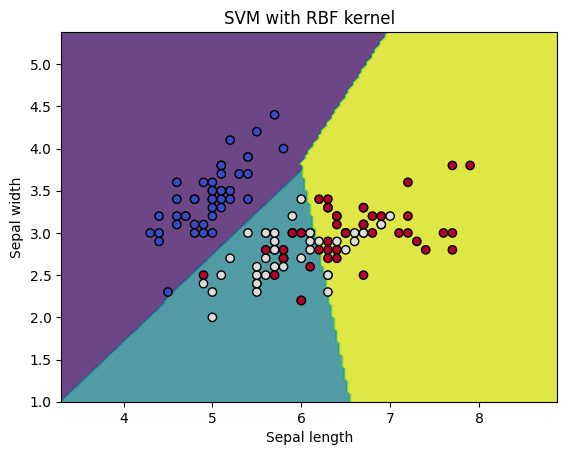

Accuracy: 0.93
Confusion Matrix:
[[6 0 0]
 [0 5 1]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SVM 모델 생성 및 학습 (RBF 커널)
model = SVC(kernel='rbf', C=120.0, gamma=0.001)
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.03  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title('SVM with RBF kernel')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


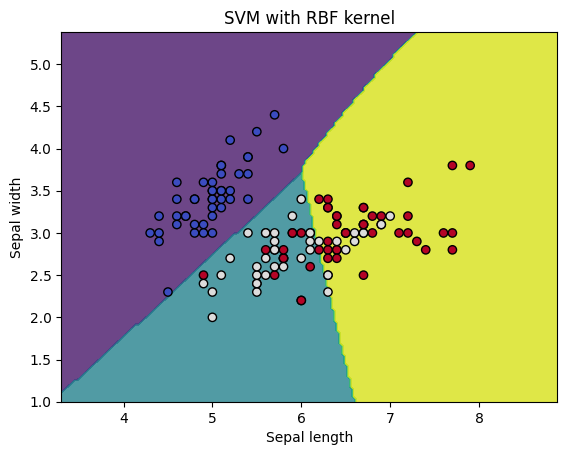

Accuracy: 0.93
Confusion Matrix:
[[6 0 0]
 [0 5 1]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.83      0.91         6
           2       0.75      1.00      0.86         3

    accuracy                           0.93        15
   macro avg       0.92      0.94      0.92        15
weighted avg       0.95      0.93      0.94        15



In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SVM 모델 생성 및 학습 (RBF 커널)
model = SVC(kernel='rbf', C=1.0, gamma=0.1)
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.03  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title('SVM with RBF kernel')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


#### GridSearch
최적의 값을 찾기 위해 여러 값을 하이퍼파라미터에 주고 GridSearchCV를 해보았습니다.

GridSearch는 5-폴드 교차 검증을 사용하고 있는데, 이는 데이터를 여러 번 나누어서 훈련하고 평가하는 방식입니다.     

test_size에 따라 값이 크게 변동하는 중 해본 결과 0.3이 가장 안정적인 값이 나왔습니다.


하지만 위에서 찾은 c=1 gamma=0.1보다도 못한 84%가 나왔습니다.
또한 90프로 이상 나오더라도 찾은 다른 하이퍼파라미터 조합은 과적합 또는 과소적합을 일으킨 경우가 많았습니다.      

- - -

결론    
=>GridSearch방식은 최적의 해가 c와 gamma에 있다고 하더라도 평가 과정 중에 떨어진다면 그 조합이 없을 수도 있습니다.

조합하는 계산 과정에서 오래 걸릴뿐만 아니라 과소적합이나 과대적합을 피하기 힘들 수 있다는 결론에 다달았습니다.

Best parameters: {'C': 0.2, 'gamma': 0.2, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.73      0.62      0.67        13
           2       0.67      0.77      0.71        13

    accuracy                           0.82        45
   macro avg       0.80      0.79      0.79        45
weighted avg       0.82      0.82      0.82        45



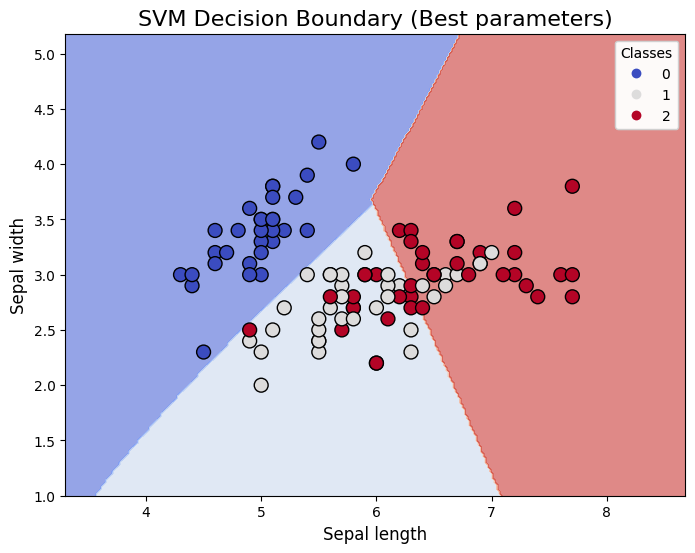

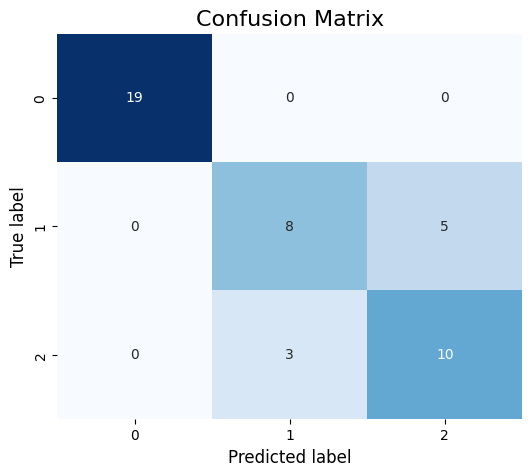

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 및 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [
        0.001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 1.8,
        2.0, 2.2, 2.5, 2.8, 3.0, 3.2, 3.5, 3.8, 4.0, 5.0, 6.0, 8.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0
    ],

    'gamma': [
        0.0001, 0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.08,
        0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0
    ],

    'kernel': ['rbf']  # RBF 커널 사용
}


# GridSearchCV 생성 (5-폴드 교차 검증)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 따른 성능 출력
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# 최적의 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가 결과 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.02  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap='coolwarm')
    plt.title('SVM Decision Boundary (Best parameters)', fontsize=16)
    plt.xlabel('Sepal length', fontsize=12)
    plt.ylabel('Sepal width', fontsize=12)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.show()

# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.show()

# 최적 모델로 결정 경계 시각화
plot_decision_boundary(X_train, y_train, best_model)

# 성능 평가: 혼동 행렬 시각화
plot_confusion_matrix(y_test, y_pred)


RandomizedSearch 사용:

GridSearch는 지정된 모든 조합을 시도하기 때문에 시간이 많이 소요될 수 있습니다. 대신 RandomizedSearchCV를 사용하면 일정 범위 내에서 무작위로 하이퍼파라미터를 선택해 빠르게 최적의 값을 찾을 수 있습니다.
- - -
하지만 GridSearch보다도 과소적합이나 과대적합의 위험도가 높고 정확도도 잘 안 나올 뿐만 아니라 넓은 랜덤한 결과 안에서 좋은 값을 얻기 위해 많은 시도를 해야했습니다.

=>결론적으로 직접 하이퍼파라미터를 설정하거나 GridSearch나 RandomizedSearch로 최적의 하이퍼파리미터를 설정하려고 하여도 애초에 3가지의 붓꽃 데이터를 구별하기에 Sepal length와 sepal width 특성 2가지만 써서 구별이 어렵다는 결론에 다달았습니다.

Best parameters: {'C': 592.4155688620424, 'gamma': 0.46460412719997723, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.74
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.86      0.67      0.75         9
           2       0.77      0.91      0.83        11

    accuracy                           0.87        30
   macro avg       0.88      0.86      0.86        30
weighted avg       0.87      0.87      0.86        30



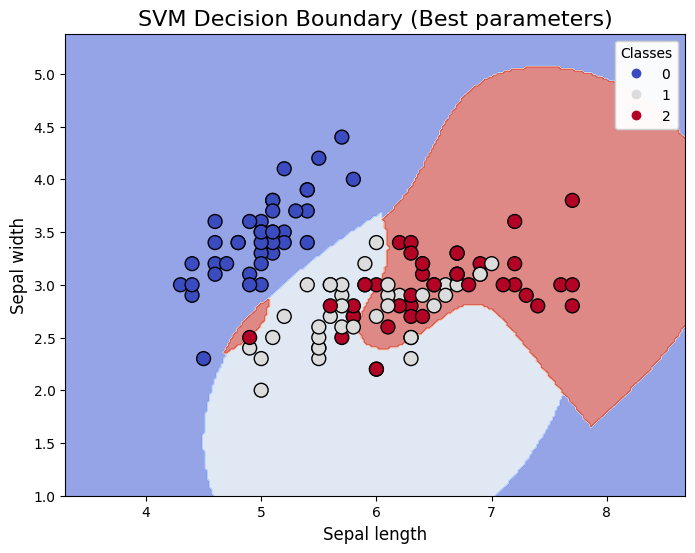

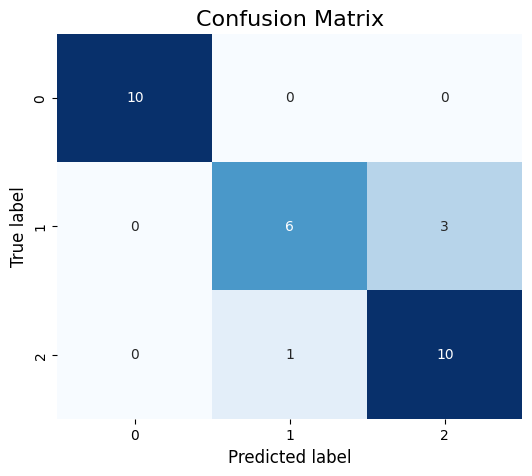

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from scipy.stats import uniform

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM 모델 및 하이퍼파라미터 검색 공간 설정 (C와 gamma를 무작위로 선택)
param_dist = {
    'C': uniform(0.001, 1000),  # C 값의 범위 (0.001부터 1000 사이의 값 무작위 선택)
    'gamma': uniform(0.0001, 10),  # gamma 값의 범위 (0.0001부터 10 사이의 값 무작위 선택)
    'kernel': ['rbf']  # RBF 커널 사용
}

# RandomizedSearchCV 생성 (5-폴드 교차 검증, 20번의 랜덤 탐색 시도)
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 따른 성능 출력
print(f"Best parameters: {random_search.best_params_}")
print(f"Best cross-validation accuracy: {random_search.best_score_:.2f}")

# 최적의 모델로 테스트 데이터 예측
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가 결과 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.02  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.6, cmap='coolwarm')

    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=100, cmap='coolwarm')
    plt.title('SVM Decision Boundary (Best parameters)', fontsize=16)
    plt.xlabel('Sepal length', fontsize=12)
    plt.ylabel('Sepal width', fontsize=12)
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.show()

# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.show()

# 최적 모델로 결정 경계 시각화
plot_decision_boundary(X_train, y_train, best_model)

# 성능 평가: 혼동 행렬 시각화
plot_confusion_matrix(y_test, y_pred)


#### iris 데이터 추가
X = iris.data로 설정하여 전체 특성(4개: Sepal length, Sepal width, Petal length, Petal width)을 사용했습니다.

=>위에서는 test_size의 크기에 따라 정확도가 크게 변경이되었다면

아래 코드는 test_size가 0.1 ~ 0.5까지 97%~98%인 것을 알 수 있습니다.

Best parameters: {'C': 8.0, 'gamma': 0.2, 'kernel': 'rbf'}
Best cross-validation accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



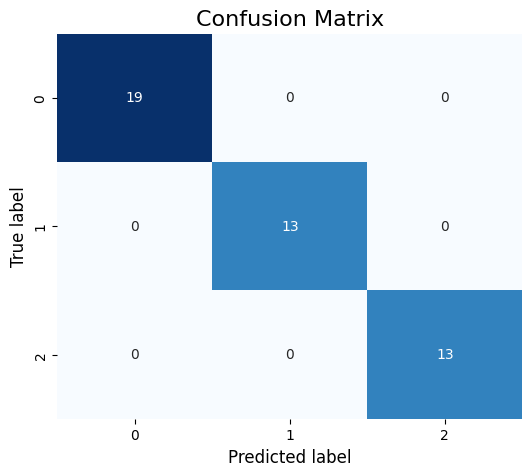

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data  # 전체 특성 선택 (Sepal length, Sepal width, Petal length, Petal width)
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# SVM 모델 및 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [
        0.001, 0.005, 0.01, 0.02, 0.05, 0.08, 0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 1.2, 1.5, 1.8,
        2.0, 2.2, 2.5, 2.8, 3.0, 3.2, 3.5, 3.8, 4.0, 5.0, 6.0, 8.0, 10.0, 20.0, 50.0, 100.0, 500.0, 1000.0
    ],
    'gamma': [
        0.0001, 0.001, 0.002, 0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.06, 0.08,
        0.1, 0.2, 0.3, 0.5, 0.8, 1.0, 2.0, 5.0, 10.0, 20.0, 50.0, 100.0
    ],
    'kernel': ['rbf']  # RBF 커널 사용
}

# GridSearchCV 생성 (5-폴드 교차 검증)
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 최적의 파라미터와 그에 따른 성능 출력
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation accuracy: {grid_search.best_score_:.2f}")

# 최적의 모델로 테스트 데이터 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가 결과 출력
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 혼동 행렬 시각화 함수
def plot_confusion_matrix(y_true, y_pred):
    conf_matrix = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title("Confusion Matrix", fontsize=16)
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.show()

# 성능 평가: 혼동 행렬 시각화
plot_confusion_matrix(y_test, y_pred)


위에서 나온 가장 좋은 조합의 c와 gamma값을 넣었을 때 모두 87% 이상 나오고 있습니다.

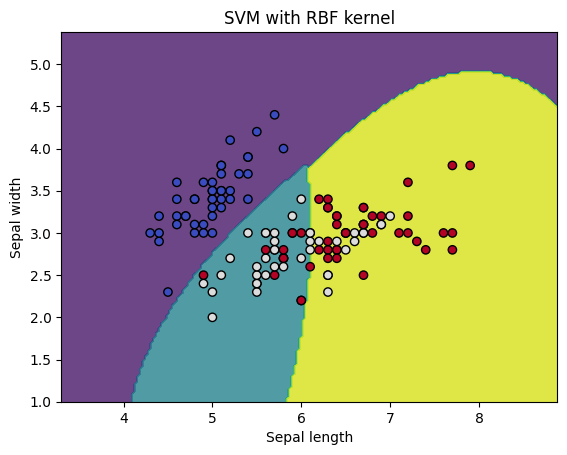

Accuracy: 0.87
Confusion Matrix:
[[6 0 0]
 [0 4 2]
 [0 0 3]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.67      0.80         6
           2       0.60      1.00      0.75         3

    accuracy                           0.87        15
   macro avg       0.87      0.89      0.85        15
weighted avg       0.92      0.87      0.87        15



In [89]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # Sepal length와 sepal width 특성만 선택
y = iris.target

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# SVM 모델 생성 및 학습 (RBF 커널)
model = SVC(kernel='rbf', C=8.0, gamma=0.2)
model.fit(X_train, y_train)

# 결정 경계 시각화 함수
def plot_decision_boundary(X, y, model):
    h = 0.03  # 결정 경계의 해상도
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap=plt.cm.coolwarm)
    plt.title('SVM with RBF kernel')
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.show()

# 결정 경계 시각화
plot_decision_boundary(X_train, y_train, model)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)
